In [50]:
import pandas as pd
train=pd.read_csv('D:\\train.csv')
test=pd.read_csv('D:\\test.csv')
combine=[train,test]
print(test.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival Survival (0 = No; 1 = Yes)

name Name

sex Sex

age Age

sibsp Number of Siblings/Spouses Aboard

parch Number of Parents/Children Aboard

ticket Ticket Number

fare Passenger Fare (British pound)

cabin Cabin

embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat Lifeboat

body Body Identification Number

home.dest Home/Destination


In [51]:
train.tail(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [52]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
train.describe(include='O')#Used for STRING values

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jonkoff, Mr. Lalio",male,347082,G6,S
freq,1,577,7,4,644


In [54]:
import seaborn as sns

In [55]:
women=train[train['Sex']=='female']
women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [56]:
men=train[train['Sex']=='male']
men.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Text(0.5, 1.0, 'Male')

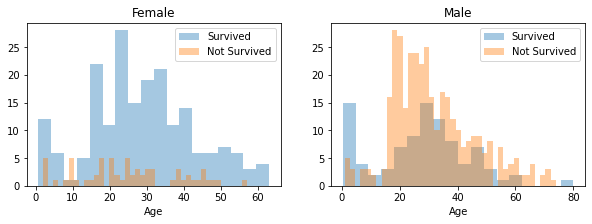

In [57]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,3))

ax=sns.distplot(women[women['Survived']==1].Age.dropna(),ax=axes[0],kde=False,bins=18,label='Survived')
ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=40,ax=axes[0],kde=False,label='Not Survived')
ax.legend()
ax.set_title('Female')

ax=sns.distplot(men[men['Survived']==1].Age.dropna(),ax=axes[1],kde=False,bins=18,label='Survived')
ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40,ax=axes[1],kde=False,label='Not Survived')
ax.legend()
ax.set_title('Male')


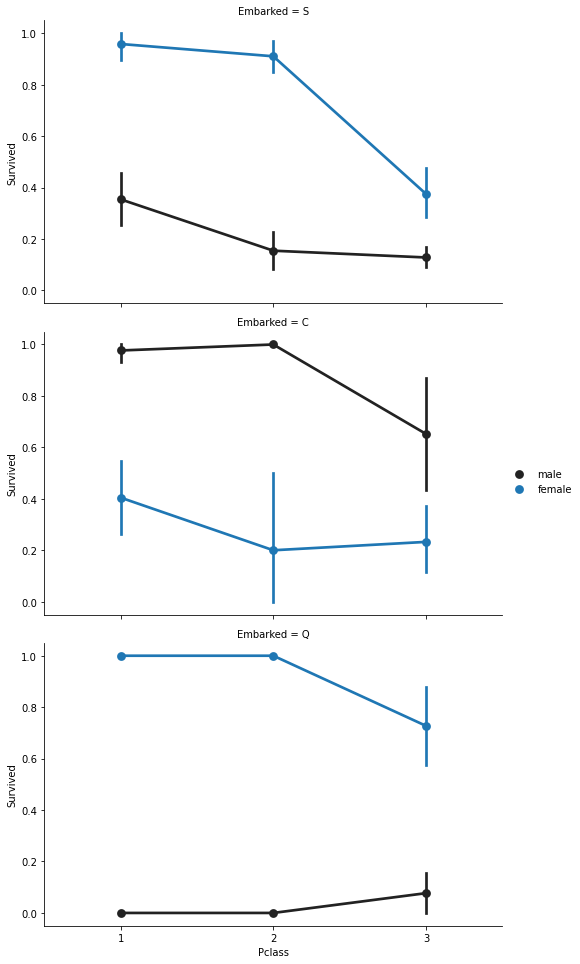

In [58]:
facetgrid=sns.FacetGrid(train,row='Embarked',height=4.5,aspect=1.6)
facetgrid.map(sns.pointplot,'Pclass','Survived','Sex',palette=None,  order=None, hue_order=None)
facetgrid.add_legend()

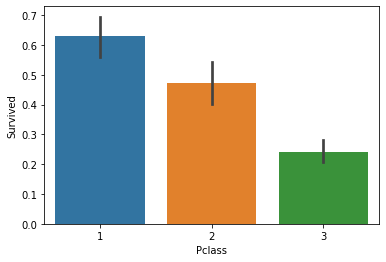

In [59]:
sns.barplot(x='Pclass',y='Survived',data=train)

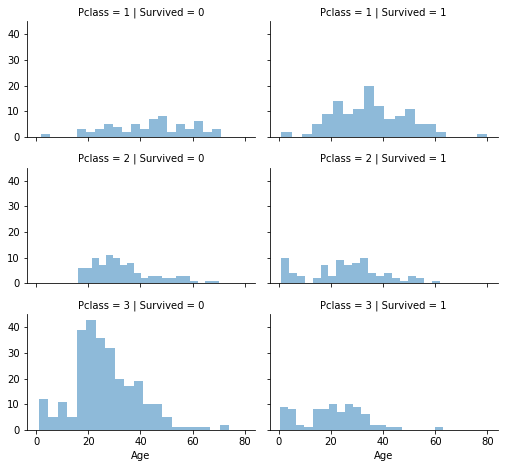

In [60]:
grid=sns.FacetGrid(train,row='Pclass',col='Survived',height=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

In [61]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [62]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [63]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [64]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [65]:
print('Before',train.shape,test.shape,combine[0].shape,combine[1].shape)
train=train.drop(['Ticket','Cabin'],axis=1)
test=test.drop(['Ticket','Cabin'],axis=1)
combine=[train,test]
'After',train.shape,test.shape,combine[0].shape,combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [66]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [67]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Rev','Sir'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [68]:
train[['Title','Survived']].groupby(['Title']).mean().sort_values(by='Survived',ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


In [69]:
ttl_mp={"Mr":1,"Miss":2,'Mrs':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(ttl_mp)
    dataset['Title']=dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [70]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 9), (418, 9))

In [71]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [72]:
import numpy as np
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [73]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [74]:
for dataset in combine:
    dataset['Family']=dataset['Parch']+dataset['SibSp']+1
train[['Family','Survived']].groupby(['Family'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [75]:
for ds in combine:
    ds['IsAlone']=0
    ds.loc[ds['Family']==1,'IsAlone']=1
train[['IsAlone','Survived']].groupby('IsAlone', as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [76]:
train=train.drop(['Parch','SibSp','Family'],axis=1)
test=test.drop(['Parch','SibSp','Family'],axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [77]:
for ds in combine:
    ds['Age&Class']=ds['Age']*ds['Pclass']
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age&Class
0,0,3,0,1,7.2500,S,1,0,3
1,1,1,1,2,71.2833,C,3,0,2
2,1,3,1,1,7.9250,S,2,1,3
3,1,1,1,2,53.1000,S,3,0,2
4,0,3,0,2,8.0500,S,1,1,6
5,0,3,0,1,8.4583,Q,1,1,3
6,0,1,0,3,51.8625,S,1,1,3
7,0,3,0,0,21.0750,S,4,0,0
8,1,3,1,1,11.1333,S,3,0,3
9,1,2,1,0,30.0708,C,3,0,0


In [78]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [79]:
for ds in combine:
    ds['Embarked']=ds['Embarked'].fillna(freq_port)
train[['Embarked','Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [80]:
for ds in combine:
    ds['Embarked']=ds['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age&Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6
5,0,3,0,1,8.4583,2,1,1,3
6,0,1,0,3,51.8625,0,1,1,3
7,0,3,0,0,21.0750,0,4,0,0
8,1,3,1,1,11.1333,0,3,0,3
9,1,2,1,0,30.0708,1,3,0,0


In [81]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age&Class
0,892,3,0,2,7.8292,2,1.0,1,6
1,893,3,1,2,7.0000,0,3.0,0,6
2,894,2,0,3,9.6875,2,1.0,1,6
3,895,3,0,1,8.6625,0,1.0,1,3
4,896,3,1,1,12.2875,0,3.0,0,3


In [82]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [83]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age&Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [84]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age&Class
0,892,3,0,2,0,2,1.0,1,6
1,893,3,1,2,0,0,3.0,0,6
2,894,2,0,3,1,2,1.0,1,6
3,895,3,0,1,1,0,1.0,1,3
4,896,3,1,1,1,0,3.0,0,3
5,897,3,0,0,1,0,1.0,1,0
6,898,3,1,1,0,2,2.0,1,3
7,899,2,0,1,2,0,1.0,0,2
8,900,3,1,1,0,1,3.0,1,3
9,901,3,0,1,2,0,1.0,0,3


In [85]:
test['Title']=test['Title'].astype(int)
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age&Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [86]:
X_train=train.drop('Survived',axis=1)
y_train=train['Survived']
X_test=test.drop('PassengerId',axis=1).copy()
X_train.shape,X_test.shape,y_train.shape

((891, 8), (418, 8), (891,))

In [87]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
Y_pred=logreg.predict(X_test)
acc_logreg=round(logreg.score(X_train,y_train)*100,2)
acc_logreg

80.36

In [88]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)
Y_pred=linreg.predict(X_test)
acc_linreg=round(linreg.score(X_train,y_train)*100,2)
acc_linreg

39.06

In [123]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

78.23

In [92]:
from sklearn.neighbors import KNeighborsClassifier as KNC
knc=KNC()
knc.fit(X_train,y_train)
Y_pred=knc.predict(X_test)

acc_knc=round(knc.score(X_train,y_train)*100,2)
acc_knc

83.95

In [93]:
from sklearn.naive_bayes import GaussianNB as GNB
gnb=GNB()
gnb.fit(X_train,y_train)
Y_pred=gnb.predict(X_test)

acc_gnb=round(gnb.score(X_train,y_train)*100,2)
acc_gnb

72.28

In [100]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC()
lsvc.fit(X_train,y_train)
Y_pred=lsvc.predict(X_test)

acc_lsvc=round(lsvc.score(X_train,y_train)*100,2)
acc_lsvc

c:\users\sharv\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.12

In [129]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc=DTC()
dtc.fit(X_train,y_train)
Y_pred=dtc.predict(X_test)

acc_dtc=round(dtc.score(X_train,y_train)*100,2)
acc_dtc
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [108]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc=RFC()
rfc.fit(X_train,y_train)
Y_pred=rfc.predict(X_test)

acc_rfc=round(rfc.score(X_train,y_train)*100,2)
acc_rfc

86.76

In [124]:
models=pd.DataFrame({'Model':['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Linear SVC', 'Linear Regression',
              'Decision Tree'],
                     'Score':[acc_svc,acc_knc,acc_logreg,acc_rfc,acc_gnb,acc_lsvc,acc_linreg,acc_dtc]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,86.76
7,Decision Tree,86.76
1,KNN,83.95
2,Logistic Regression,80.36
5,Linear SVC,79.12
0,Support Vector Machines,78.23
4,Naive Bayes,72.28
6,Linear Regression,39.06


In [127]:
submission=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':Y_pred})
submission.to_csv('D:\\Submssion.csv',index=False)

In [128]:
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,